## 探索电影数据集

在这个项目中，你将尝试使用所学的知识，使用 `NumPy`、`Pandas`、`matplotlib`、`seaborn` 库中的函数，来对电影数据集进行探索。

下载数据集：
[TMDb电影数据](https://s3.cn-north-1.amazonaws.com.cn/static-documents/nd101/explore+dataset/tmdb-movies.csv)



数据集各列名称的含义：
<table>
<thead><tr><th>列名称</th><th>id</th><th>imdb_id</th><th>popularity</th><th>budget</th><th>revenue</th><th>original_title</th><th>cast</th><th>homepage</th><th>director</th><th>tagline</th><th>keywords</th><th>overview</th><th>runtime</th><th>genres</th><th>production_companies</th><th>release_date</th><th>vote_count</th><th>vote_average</th><th>release_year</th><th>budget_adj</th><th>revenue_adj</th></tr></thead><tbody>
 <tr><td>含义</td><td>编号</td><td>IMDB 编号</td><td>知名度</td><td>预算</td><td>票房</td><td>名称</td><td>主演</td><td>网站</td><td>导演</td><td>宣传词</td><td>关键词</td><td>简介</td><td>时常</td><td>类别</td><td>发行公司</td><td>发行日期</td><td>投票总数</td><td>投票均值</td><td>发行年份</td><td>预算（调整后）</td><td>票房（调整后）</td></tr>
</tbody></table>


**请注意，你需要提交该报告导出的 `.html`、`.ipynb` 以及 `.py` 文件。**



---

---

## 第一节 数据的导入与处理

在这一部分，你需要编写代码，使用 Pandas 读取数据，并进行预处理。


**任务1.1：** 导入库以及数据

1. 载入需要的库 `NumPy`、`Pandas`、`matplotlib`、`seaborn`。
2. 利用 `Pandas` 库，读取 `tmdb-movies.csv` 中的数据，保存为 `movie_data`。

提示：记得使用 notebook 中的魔法指令 `%matplotlib inline`，否则会导致你接下来无法打印出图像。

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt

%matplotlib inline

---

**任务1.2: ** 了解数据

你会接触到各种各样的数据表，因此在读取之后，我们有必要通过一些简单的方法，来了解我们数据表是什么样子的。

1. 获取数据表的行列，并打印。
2. 使用 `.head()`、`.tail()`、`.sample()` 方法，观察、了解数据表的情况。
3. 使用 `.dtypes` 属性，来查看各列数据的数据类型。
4. 使用 `isnull()` 配合 `.any()` 等方法，来查看各列是否存在空值。
5. 使用 `.describe()` 方法，看看数据表中数值型的数据是怎么分布的。



In [3]:
data_TMDb = pd.read_csv('tmdb-movies.csv')

print(data_TMDb.head())
print(data_TMDb.tail())
print(data_TMDb.sample())

#来查看各列数据的数据类型
print(data_TMDb.dtypes)

#查看各列是否存在空值
print(data_TMDb.isnull().any())

#数据表中数值型的数据分布
print(data_TMDb.describe())


       id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      

---

**任务1.3: ** 清理数据

在真实的工作场景中，数据处理往往是最为费时费力的环节。但是幸运的是，我们提供给大家的 tmdb 数据集非常的「干净」，不需要大家做特别多的数据清洗以及处理工作。在这一步中，你的核心的工作主要是对数据表中的空值进行处理。你可以使用 `.fillna()` 来填补空值，当然也可以使用 `.dropna()` 来丢弃数据表中包含空值的某些行或者列。

任务：使用适当的方法来清理空值，并将得到的数据保存。

In [4]:
# 删除暂不需要的数据列
data_TMDb.drop(['homepage','overview','tagline','keywords'],axis=1,inplace=True)

# 处理 nan 为 ‘unknow‘
data_TMDb.fillna('unknow',inplace=True)

print(data_TMDb.isnull().any())

id                      False
imdb_id                 False
popularity              False
budget                  False
revenue                 False
original_title          False
cast                    False
director                False
runtime                 False
genres                  False
production_companies    False
release_date            False
vote_count              False
vote_average            False
release_year            False
budget_adj              False
revenue_adj             False
dtype: bool


---

---

## 第二节 根据指定要求读取数据


相比 Excel 等数据分析软件，Pandas 的一大特长在于，能够轻松地基于复杂的逻辑选择合适的数据。因此，如何根据指定的要求，从数据表当获取适当的数据，是使用 Pandas 中非常重要的技能，也是本节重点考察大家的内容。



---

**任务2.1: ** 简单读取

1. 读取数据表中名为 `id`、`popularity`、`budget`、`runtime`、`vote_average` 列的数据。
2. 读取数据表中前1～20行以及48、49行的数据。
3. 读取数据表中第50～60行的 `popularity` 那一列的数据。

要求：每一个语句只能用一行代码实现。

In [5]:
data_colums = data_TMDb[['id','popularity','budget','runtime','vote_average']]
data_rows = data_TMDb[:20].append(data_TMDb[47:49])
data_popularity = data_TMDb['popularity'].iloc[49:60]

**任务2.2: **逻辑读取（Logical Indexing）

1. 读取数据表中 **`popularity` 大于5** 的所有数据。
2. 读取数据表中 **`popularity` 大于5** 的所有数据且**发行年份在1996年之后**的所有数据。

提示：Pandas 中的逻辑运算符如 `&`、`|`，分别代表`且`以及`或`。

要求：请使用 Logical Indexing实现。

In [6]:
data_TMDb[data_TMDb['popularity'].values > 5]

data_TMDb[(data_TMDb['release_year'].values>1996) & (data_TMDb['popularity'].values>5)]

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15,3935,8.0,2015,1.609999e+08,7.854116e+08


---

**任务2.3: **分组读取

1. 对 `release_year` 进行分组，使用 [`.agg`](http://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.core.groupby.DataFrameGroupBy.agg.html) 获得 `revenue` 的均值。
2. 对 `director` 进行分组，使用 [`.agg`](http://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.core.groupby.DataFrameGroupBy.agg.html) 获得 `popularity` 的均值，从高到低排列。

要求：使用 `Groupby` 命令实现。

In [7]:
data_TMDb.groupby(['release_year'])['revenue'].agg('mean')

data_TMDb.groupby(['director'])['popularity'].agg('mean').sort_values(ascending=False)

director
Colin Trevorrow                     16.696886
Joe Russo|Anthony Russo             12.971027
Chad Stahelski|David Leitch         11.422751
Don Hall|Chris Williams              8.691294
Juno John Lee                        8.411577
Kyle Balda|Pierre Coffin             7.404165
Alan Taylor                          6.883129
Peter Richardson                     6.668990
Pete Docter                          6.326804
Christopher Nolan                    6.195521
Alex Garland                         6.118847
Patrick Tatopoulos                   5.806897
Wes Ball                             5.553082
Dan Gilroy                           5.522641
Lilly Wachowski|Lana Wachowski       5.331930
James Gunn                           5.225378
Bob Peterson|Pete Docter             4.908902
J.J. Abrams                          4.800957
Alejandro GonzÃ¡lez IÃ±Ã¡rritu       4.793536
Roger Allers|Rob Minkoff             4.782688
Damien Chazelle                      4.780419
Morten Tyldum            

---

---

## 第三节 绘图与可视化

接着你要尝试对你的数据进行图像的绘制以及可视化。这一节最重要的是，你能够选择合适的图像，对特定的可视化目标进行可视化。所谓可视化的目标，是你希望从可视化的过程中，观察到怎样的信息以及变化。例如，观察票房随着时间的变化、哪个导演最受欢迎等。

<table>
<thead><tr><th>可视化的目标</th><th>可以使用的图像</th></tr></thead><tbody>
 <tr><td>表示某一属性数据的分布</td><td>饼图、直方图、散点图</td></tr>
 <tr><td>表示某一属性数据随着某一个变量变化</td><td>条形图、折线图、热力图</td></tr>
 <tr><td>比较多个属性的数据之间的关系</td><td>散点图、小提琴图、堆积条形图、堆积折线图</td></tr>
</tbody></table>

在这个部分，你需要根据题目中问题，选择适当的可视化图像进行绘制，并进行相应的分析。对于选做题，他们具有一定的难度，你可以尝试挑战一下～

**任务3.1：**对 `popularity` 最高的20名电影绘制其 `popularity` 值。

Text(0,0.5,'original title')

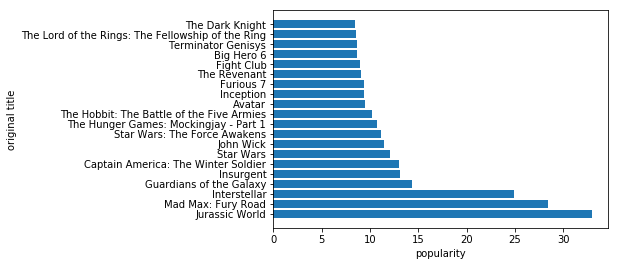

In [8]:
popularitys = data_TMDb['popularity'].sort_values(ascending=False)[:20]
movie_names = data_TMDb['original_title'][popularitys.index].values

x = np.arange(0,popularitys.shape[0],1)

plt.barh(x,popularitys.values)
plt.yticks(x,movie_names)
plt.xlabel('popularity')
plt.ylabel('original title')

结论：知名度最高的20电影，其中 jurassic World 电影知名度最高
(结论是暂时的，可能需要改进)

---
**任务3.2：**分析电影净利润（票房-成本）随着年份变化的情况，并简单进行分析。

Text(0,0.5,'profit mean')

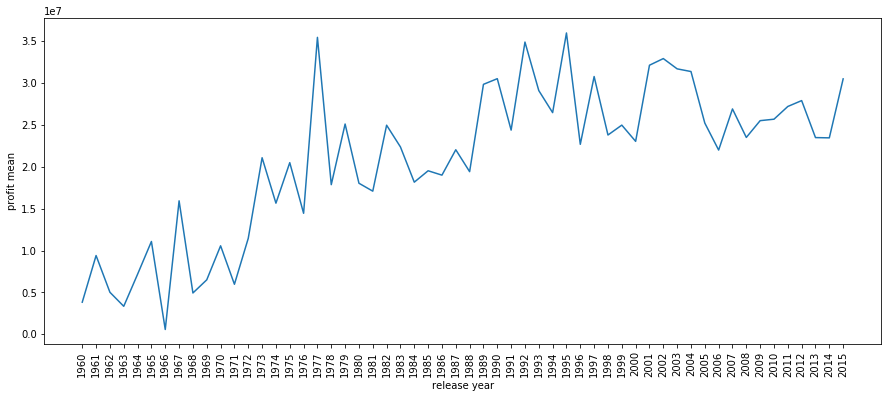

In [9]:
#利润队列
data_TMDb['profit'] = data_TMDb['revenue'] - data_TMDb['budget']

y_means = data_TMDb.groupby('release_year')['profit'].mean()

plt.figure(figsize=(15, 6))
plt.errorbar(x=y_means.index.astype(str), y=y_means)
plt.xticks(rotation='90')
plt.xlabel('release year')
plt.ylabel('profit mean')

结论: 在1971～1973 之间。电影的整体利润上升到一个新阶段。在1973 到 2015 电影利润稳定在1.5 ～ 3.5 （1e7）之间波动
(结论是暂时的，可能需要改进)

---

**[选做]任务3.3：**选择最多产的10位导演（电影数量最多的），绘制他们排行前3的三部电影的票房情况，并简要进行分析。

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text xticklabel objects>)

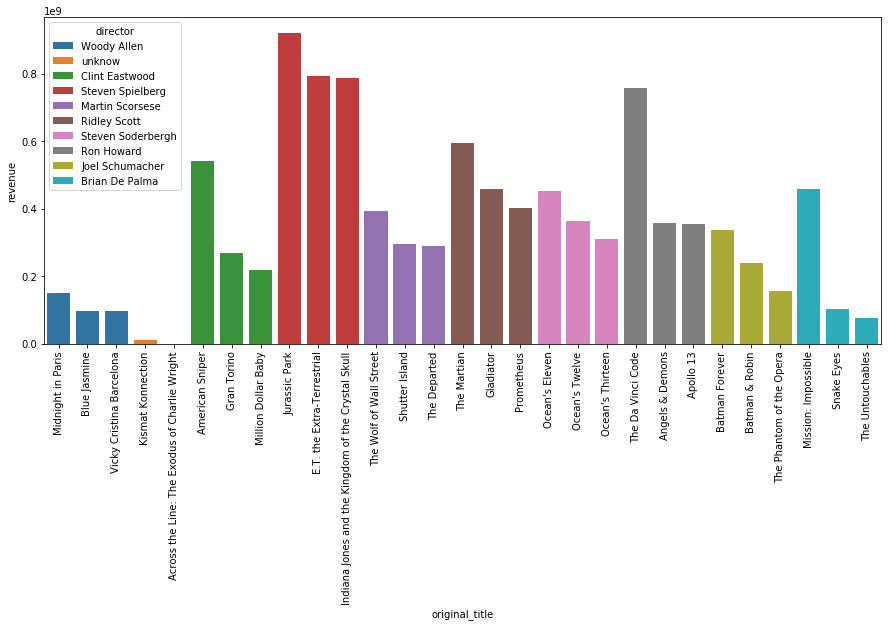

In [10]:
# 获取最多产的10位导演
data_director = data_TMDb['director'].value_counts().index[:10]

# 使用导演分组，获取到每位导演票房
data_revenue = data_TMDb.groupby(['director'])['revenue'].value_counts()

#使用导演、票房分组，获得电影名
movies_name = data_TMDb.groupby(['director','revenue'])['original_title'].value_counts()

# 获取到每为导演票房排行前3的数据
list_director = list()
list_revenue = list()
list_movies = list()
for index in range(0,len(data_director),1):
    director = data_director[index]
    revenue = data_revenue[director].index.sort_values(ascending=False)[:3]
    for count in range(0,len(revenue),1):
        list_revenue.append(revenue[count])
        list_director.append(director)
        list_movies.append(movies_name[director][revenue[count]].index.values[0])

item = {
    'director': pd.Series(data=list_director),
    'revenue': pd.Series(data=list_revenue),
    'original_title': pd.Series(data=list_movies)
}

new_data = pd.DataFrame(item)
plt.figure(figsize=(15, 6))
sb.barplot(x='original_title',y='revenue',hue='director',data=new_data,dodge=False)
plt.xticks(rotation = 90)

结论：Peter jsckson 导演的三部电影均为最高的票房。john Carpenter 导演的三部票房最低
(结论是暂时的，可能需要改进)

---

**[选做]任务3.4：**分析1968年~2015年六月电影的数量的变化。

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]),
 <a list of 48 Text xticklabel objects>)

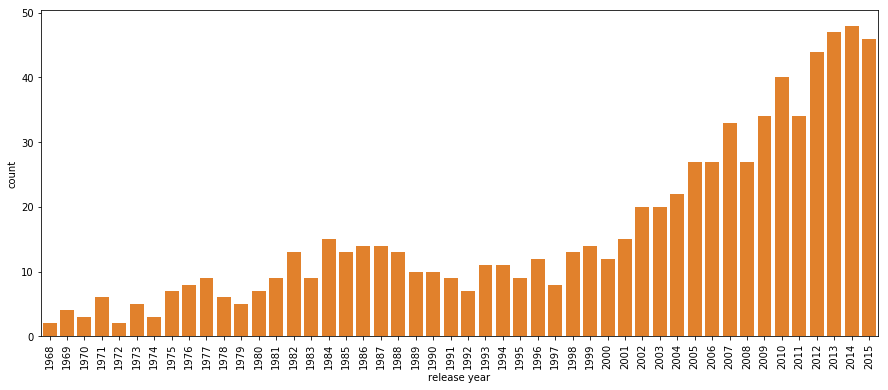

In [11]:
#收集到1968 ～ 2015 年的电影数据
release_year_data = data_TMDb[(data_TMDb['release_year'].values >= 1968) & (data_TMDb['release_year'].values<=2015)]
release_date_data = pd.to_datetime(release_year_data['release_date'])

data_list = list()
for index in range(0,len(release_date_data),1):
    if release_date_data.iloc[index].month == 6:
        data_list.append(release_date_data.iloc[index].year)

item = {'release year':pd.Series(data_list)}
year_dataFrame = pd.DataFrame(item)

bash_color = sb.color_palette()[1]
plt.figure(figsize=(15,6))
sb.countplot(x='release year',data=year_dataFrame,color=bash_color)
plt.xticks(rotation='90')

结论：6月份的电影数量在1975年到2010年之间逐渐上升。2010 年达到最高峰
(结论是暂时的，可能需要改进)

**[选做]任务3.5：**分析1968年~2015年六月电影 `Comedy` 和 `Drama` 两类电影的数量的变化。

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]),
 <a list of 48 Text xticklabel objects>)

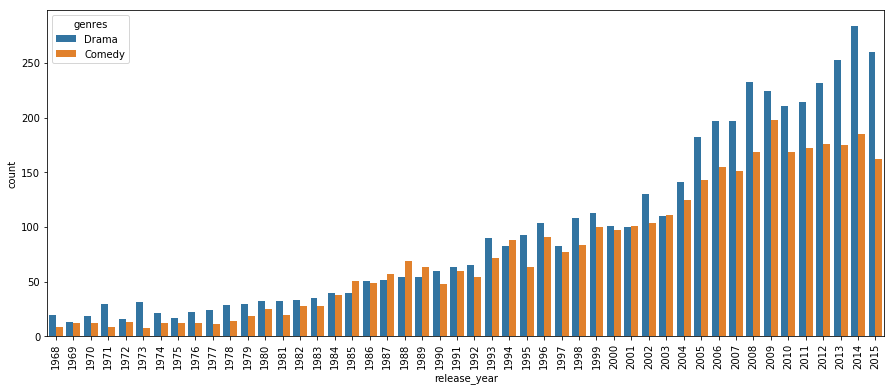

In [12]:
#收集到1968 ～ 2015 年的电影数据
rel_data = data_TMDb[(data_TMDb['release_year'].values >= 1968) & (data_TMDb['release_year'].values<=2015)]

#拆分电影类型的数据
new_genres = rel_data['genres'].str.split('|',expand=True).stack().reset_index(level=1,drop=True).rename('genres')

# 添加新的电影类型数据
tag_data = rel_data.drop('genres',axis=1).join(new_genres)

data_movies = tag_data[tag_data['genres'].str.contains('Comedy|Drama')]
#收集到`Comedy` 和 `Drama` 两类电影数据
#data_movies = rel_data[(rel_data['genres'].values=='Comedy') | (rel_data['genres'].values=='Drama')]

plt.figure(figsize=(15,6))
sb.countplot(x='release_year',hue='genres',data=data_movies)
plt.xticks(rotation='90')

结论：Conmedy 和 Drama 两类电影的数量都呈现上升趋势，其中2014年Drama 类型的电影达到最高峰，2009年 Comedy 类型的电影到达高峰。2014年之后Drama 类型的电影要明显高于 Comedy 类型。
(结论是暂时的，可能需要改进)

> 注意: 当你写完了所有的代码，并且回答了所有的问题。你就可以把你的 iPython Notebook 导出成 HTML 文件。你可以在菜单栏，这样导出**File -> Download as -> HTML (.html)、Python (.py)** 把导出的 HTML、python文件 和这个 iPython notebook 一起提交给审阅者。